#Accessing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


<summary><font size="3" color="#ADD8E6"><b>Libraries</b></font></summary>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

<summary><font size="3" color="#ADD8E6"><b>Accessing UC Irvine Machine Learning Repository</b></font></summary>

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

In [ ]:
metro_interstate = fetch_ucirepo(id=492)

In [ ]:
print(metro_interstate.metadata)

{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

In [ ]:
# I create a base dataframe (df0), as well as the dataframe upon which I will work.
df0 = pd.read_csv('https://archive.ics.uci.edu/static/public/492/data.csv')
df = pd.read_csv('https://archive.ics.uci.edu/static/public/492/data.csv')

#EDA

##Summary Statistics

<details>
  <summary><font size="3" color="#ADD8E6"><b>Dataset Information</b></font></summary>
  
  **Dataset Source:**  [Metro Interstate Traffic Volume](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)
  
  **Description:** Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.
</details>

<details>
  <summary><font size="3" color="#ADD8E6"><b>Feature Attributes</b></font></summary>
  
  | Variable Name       | Role     | Type          | Description                                               | Units  | Missing Values |
  |---------------------|----------|---------------|-----------------------------------------------------------|--------|----------------|
  | **holiday**         | Feature  | Categorical   | US National holidays plus regional holiday, Minnesota State Fair | None   | No             |
  | **temp**            | Feature  | Continuous    | Average temp in Kelvin                                    | Kelvin | No             |
  | **rain_1h**         | Feature  | Continuous    | Amount in mm of rain that occurred in the hour            | mm     | No             |
  | **snow_1h**         | Feature  | Continuous    | Amount in mm of snow that occurred in the hour            | mm     | No             |
  | **clouds_all**      | Feature  | Integer       | Percentage of cloud cover                                 | %      | No             |
  | **weather_main**    | Feature  | Categorical   | Short textual description of the current weather          | None   | No             |
  | **weather_description** | Feature  | Categorical   | Longer textual description of the current weather         | None   | No             |
  | **date_time**       | Feature  | Date          | Hour of the data collected in local CST time              | None   | No             |
  | **traffic_volume**  | Target   | Integer       | Hourly I-94 ATR 301 reported westbound traffic volume     | None   | No             |
  
</details>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


<summary><font size="3" color="#ADD8E6"><b>Notes</b></font></summary>

* 9 columns
* Mix of data types
* Significant null values in holiday column
* Large dataset - almost 50 thousand rows


In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


<summary><font size="3" color="#ADD8E6"><b>Notes</b></font></summary>

* Temperature Values: 0 (likely errors)
* Rain_1h: outlier value (9831)
* Weather main and Weather Description: necessary to keep both?
* Date Time: dtype to be adjusted


In [ ]:
df.shape

(48204, 9)

##Preprocessing

<summary><font size="3" color="#ADD8E6"><b>Duplicates</b></font></summary>

In [ ]:
df.duplicated().sum()

17

In [ ]:
df[df.duplicated()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
18697,NaN,286.290,0.0,0.0,1,Clear,sky is clear,2015-09-30 19:00:00,3679
23851,NaN,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
26784,NaN,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26980,NaN,287.860,0.0,0.0,0,Clear,Sky is Clear,2016-09-29 19:00:00,3435
27171,NaN,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
28879,NaN,267.890,0.0,0.0,90,Snow,light snow,2016-12-06 18:00:00,4520
29268,NaN,254.220,0.0,0.0,1,Clear,sky is clear,2016-12-19 00:00:00,420
34711,NaN,295.010,0.0,0.0,40,Clouds,scattered clouds,2017-06-21 11:00:00,4808
34967,NaN,292.840,0.0,0.0,1,Clear,sky is clear,2017-06-30 10:00:00,4638
34969,NaN,294.520,0.0,0.0,1,Clear,sky is clear,2017-06-30 11:00:00,4725


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(48187, 9)

<summary><font size="3" color="#ADD8E6"><b>Null Values</b></font></summary>

*In this dataset there are 3 issues relating to the holiday column:*

1. Only the first hour of a holiday is tagged as that holiday.
2. There is no value for no holiday, resulting in Null values.
3. Some holidays are incorrectly labeled; e.g. " (2017, 1, 2): 'New Years Day' "

*I correct these issues via the following steps:*

1. I correct date_time from a string to a pandas date_time format
2. I assign each date with the associated holiday and create a dictionary.
3. I use a loop to assign each date in the dictionary with the corresponding holiday (I correct the obvious mistakes).
4. Finally, I assign all else as No Holiday.

*Via the following steps, I'm able to eliminate all null values from this dataset and make the holiday column usable for Analysis and Modeling.*

In [ ]:
df.isnull().sum()

,0
holiday,48126
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [ ]:
df[df['holiday'].notnull()]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
126,Columbus Day,273.080,0.00,0.0,20,Clouds,few clouds,2012-10-08 00:00:00,455
1123,Veterans Day,288.120,0.00,0.0,87,Clear,sky is clear,2012-11-12 00:00:00,1000
1370,Thanksgiving Day,278.540,0.00,0.0,20,Mist,mist,2012-11-22 00:00:00,919
2360,Christmas Day,264.400,0.00,0.0,90,Clouds,overcast clouds,2012-12-25 00:00:00,803
2559,New Years Day,263.490,0.00,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439
...,...,...,...,...,...,...,...,...,...
44441,Memorial Day,299.487,0.00,0.0,24,Clouds,few clouds,2018-05-28 00:00:00,1088
45547,Independence Day,297.550,0.00,0.0,1,Mist,mist,2018-07-04 00:00:00,1021
46936,State Fair,289.020,0.00,0.0,1,Clear,sky is clear,2018-08-23 00:00:00,596
47330,Labor Day,292.430,0.25,0.0,1,Rain,light rain,2018-09-03 00:00:00,962


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date'] = df['date_time'].dt.date

In [ ]:
df.loc[df[['holiday', 'date']].notnull().all(axis=1), ['holiday', 'date']]

,holiday,date
126,Columbus Day,2012-10-08
1123,Veterans Day,2012-11-12
1370,Thanksgiving Day,2012-11-22
2360,Christmas Day,2012-12-25
2559,New Years Day,2013-01-01
...,...,...
44441,Memorial Day,2018-05-28
45547,Independence Day,2018-07-04
46936,State Fair,2018-08-23
47330,Labor Day,2018-09-03


In [ ]:
nullholdict = df.loc[df[['holiday', 'date']].notnull().all(axis=1), ['holiday', 'date']].set_index('date')['holiday'].to_dict()
nullholdict

{datetime.date(2012, 10, 8): 'Columbus Day',
 datetime.date(2012, 11, 12): 'Veterans Day',
 datetime.date(2012, 11, 22): 'Thanksgiving Day',
 datetime.date(2012, 12, 25): 'Christmas Day',
 datetime.date(2013, 1, 1): 'New Years Day',
 datetime.date(2013, 2, 18): 'Washingtons Birthday',
 datetime.date(2013, 5, 27): 'Memorial Day',
 datetime.date(2013, 7, 4): 'Independence Day',
 datetime.date(2013, 8, 22): 'State Fair',
 datetime.date(2013, 9, 2): 'Labor Day',
 datetime.date(2013, 10, 14): 'Columbus Day',
 datetime.date(2013, 11, 11): 'Veterans Day',
 datetime.date(2013, 11, 28): 'Thanksgiving Day',
 datetime.date(2013, 12, 25): 'Christmas Day',
 datetime.date(2014, 1, 1): 'New Years Day',
 datetime.date(2014, 1, 20): 'Martin Luther King Jr Day',
 datetime.date(2014, 2, 17): 'Washingtons Birthday',
 datetime.date(2014, 5, 26): 'Memorial Day',
 datetime.date(2015, 7, 3): 'Independence Day',
 datetime.date(2015, 8, 27): 'State Fair',
 datetime.date(2015, 9, 7): 'Labor Day',
 datetime.date(

In [ ]:
import datetime
cleaneddict = {
    datetime.date(2012, 10, 8): 'Columbus Day',
    datetime.date(2012, 11, 12): 'Veterans Day',
    datetime.date(2012, 11, 22): 'Thanksgiving Day',
    datetime.date(2012, 12, 25): 'Christmas Day',
    datetime.date(2013, 1, 1): 'New Years Day',
    datetime.date(2013, 2, 18): 'Washingtons Birthday',
    datetime.date(2013, 5, 27): 'Memorial Day',
    datetime.date(2013, 7, 4): 'Independence Day',
    datetime.date(2013, 8, 22): 'State Fair',
    datetime.date(2013, 9, 2): 'Labor Day',
    datetime.date(2013, 10, 14): 'Columbus Day',
    datetime.date(2013, 11, 11): 'Veterans Day',
    datetime.date(2013, 11, 28): 'Thanksgiving Day',
    datetime.date(2013, 12, 25): 'Christmas Day',
    datetime.date(2014, 1, 1): 'New Years Day',
    datetime.date(2014, 1, 20): 'Martin Luther King Jr Day',
    datetime.date(2014, 2, 17): 'Washingtons Birthday',
    datetime.date(2014, 5, 26): 'Memorial Day',
    datetime.date(2015, 7, 3): 'Independence Day',
    datetime.date(2015, 8, 27): 'State Fair',
    datetime.date(2015, 9, 7): 'Labor Day',
    datetime.date(2015, 10, 12): 'Columbus Day',
    datetime.date(2015, 11, 11): 'Veterans Day',
    datetime.date(2015, 11, 26): 'Thanksgiving Day',
    datetime.date(2015, 12, 25): 'Christmas Day',
    datetime.date(2016, 1, 1): 'New Years Day',
    datetime.date(2016, 2, 15): 'Washingtons Birthday',
    datetime.date(2016, 5, 30): 'Memorial Day',
    datetime.date(2016, 7, 4): 'Independence Day',
    datetime.date(2016, 8, 25): 'State Fair',
    datetime.date(2016, 9, 5): 'Labor Day',
    datetime.date(2016, 10, 10): 'Columbus Day',
    datetime.date(2016, 11, 11): 'Veterans Day',
    datetime.date(2016, 11, 24): 'Thanksgiving Day',
    datetime.date(2016, 12, 25): 'Christmas Day',
    datetime.date(2017, 1, 1): 'New Years Day',
    datetime.date(2017, 1, 16): 'Martin Luther King Jr Day',
    datetime.date(2017, 2, 20): 'Washingtons Birthday',
    datetime.date(2017, 5, 29): 'Memorial Day',
    datetime.date(2017, 7, 4): 'Independence Day',
    datetime.date(2017, 8, 24): 'State Fair',
    datetime.date(2017, 9, 4): 'Labor Day',
    datetime.date(2017, 10, 9): 'Columbus Day',
    datetime.date(2017, 11, 10): 'Veterans Day',
    datetime.date(2017, 11, 23): 'Thanksgiving Day',
    datetime.date(2017, 12, 25): 'Christmas Day',
    datetime.date(2018, 1, 1): 'New Years Day',
    datetime.date(2018, 1, 15): 'Martin Luther King Jr Day',
    datetime.date(2018, 2, 19): 'Washingtons Birthday',
    datetime.date(2018, 5, 28): 'Memorial Day',
    datetime.date(2018, 7, 4): 'Independence Day',
    datetime.date(2018, 8, 23): 'State Fair',
    datetime.date(2018, 9, 3): 'Labor Day'
}

In [ ]:
df['holiday'] = df.apply(
    lambda row: cleaneddict[row['date']] if pd.isnull(row['holiday']) and row['date'] in cleaneddict else row['holiday'],
    axis=1
)

In [ ]:
df['holiday'].value_counts()

,count
holiday,
Christmas Day,167
Labor Day,157
Washingtons Birthday,136
Thanksgiving Day,135
Memorial Day,134
Independence Day,126
Veterans Day,120
State Fair,120
New Years Day,114


In [ ]:
df['holiday'] = df['holiday'].fillna('No Holiday')

In [ ]:
df['holiday'].value_counts()

,count
holiday,
No Holiday,46759
Christmas Day,167
Labor Day,157
Washingtons Birthday,136
Thanksgiving Day,135
Memorial Day,134
Independence Day,126
Veterans Day,120
State Fair,120


In [ ]:
df.isnull().sum()

,0
holiday,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0
date,0


<summary><font size="3" color="#ADD8E6"><b>String Cleaning</b></font></summary>

*I need to clean the following string dtypes to something usable*

 + Weather Descriptions - I want to simplify these? the string values are difficult to interpret.
 + Date - I need to encode these to simpler int dtype columns, better suited for modeling.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48187 entries, 0 to 48203
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48187 non-null  object        
 1   temp                 48187 non-null  float64       
 2   rain_1h              48187 non-null  float64       
 3   snow_1h              48187 non-null  float64       
 4   clouds_all           48187 non-null  int64         
 5   weather_main         48187 non-null  object        
 6   weather_description  48187 non-null  object        
 7   date_time            48187 non-null  datetime64[ns]
 8   traffic_volume       48187 non-null  int64         
 9   date                 48187 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 4.0+ MB


In [ ]:
df['weather_main'].value_counts()

,count
weather_main,
Clouds,15158
Clear,13384
Mist,5949
Rain,5672
Snow,2875
Drizzle,1820
Haze,1360
Thunderstorm,1033
Fog,912


In [ ]:
weather_desc = df['weather_description'].value_counts().to_dict()
weather_desc

{'sky is clear': 11659,
 'mist': 5949,
 'overcast clouds': 5079,
 'broken clouds': 4663,
 'scattered clouds': 3460,
 'light rain': 3372,
 'few clouds': 1956,
 'light snow': 1945,
 'Sky is Clear': 1725,
 'moderate rain': 1664,
 'haze': 1360,
 'light intensity drizzle': 1099,
 'fog': 912,
 'proximity thunderstorm': 673,
 'drizzle': 651,
 'heavy snow': 616,
 'heavy intensity rain': 467,
 'snow': 293,
 'proximity shower rain': 136,
 'thunderstorm': 124,
 'heavy intensity drizzle': 64,
 'thunderstorm with heavy rain': 63,
 'thunderstorm with light rain': 54,
 'proximity thunderstorm with rain': 52,
 'thunderstorm with rain': 37,
 'smoke': 20,
 'very heavy rain': 18,
 'thunderstorm with light drizzle': 15,
 'light intensity shower rain': 13,
 'proximity thunderstorm with drizzle': 13,
 'light shower snow': 11,
 'light rain and snow': 6,
 'shower drizzle': 6,
 'SQUALLS': 4,
 'sleet': 3,
 'thunderstorm with drizzle': 2,
 'freezing rain': 2,
 'shower snow': 1}

In [ ]:
mapping_dict = {
    'sky is clear': 'clear',
    'Sky is Clear': 'clear',
    'few clouds': 'cloudy',
    'scattered clouds': 'cloudy',
    'broken clouds': 'cloudy',
    'overcast clouds': 'cloudy',
    'mist': 'foggy',
    'haze': 'foggy',
    'fog': 'foggy',
    'smoke': 'foggy',
    'light rain': 'rain',
    'moderate rain': 'rain',
    'heavy intensity rain': 'rain',
    'very heavy rain': 'rain',
    'light intensity drizzle': 'rain',
    'drizzle': 'rain',
    'heavy intensity drizzle': 'rain',
    'shower drizzle': 'rain',
    'proximity shower rain': 'rain',
    'light intensity shower rain': 'rain',
    'light snow': 'snow',
    'snow': 'snow',
    'heavy snow': 'snow',
    'light shower snow': 'snow',
    'shower snow': 'snow',
    'light rain and snow': 'snow',
    'sleet': 'snow',
    'freezing rain': 'snow',
    'thunderstorm': 'storm',
    'proximity thunderstorm': 'storm',
    'proximity thunderstorm with rain': 'storm',
    'thunderstorm with rain': 'storm',
    'thunderstorm with light rain': 'storm',
    'thunderstorm with heavy rain': 'storm',
    'thunderstorm with drizzle': 'storm',
    'proximity thunderstorm with drizzle': 'storm',
    'thunderstorm with light drizzle': 'storm',
    'SQUALLS': 'storm'
}

In [ ]:
df['weather_description'] = df['weather_description'].map(mapping_dict)
df['weather_description'].value_counts()

,count
weather_description,
cloudy,15158
clear,13384
foggy,8241
rain,7490
snow,2877
storm,1037


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['date'].info()

<class 'pandas.core.series.Series'>
Index: 48187 entries, 0 to 48203
Series name: date
Non-Null Count  Dtype         
--------------  -----         
48187 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 752.9 KB


**Adding in date & time columns**

In [ ]:
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['week'] = df['date_time'].dt.isocalendar().week
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()

##Univariate

<summary><font size="3" color="#ADD8E6"><b>Distribution Analysis</b></font></summary>

*   For a quick and brief overview of Data distributions
*   Combined Histogram and Barplots.

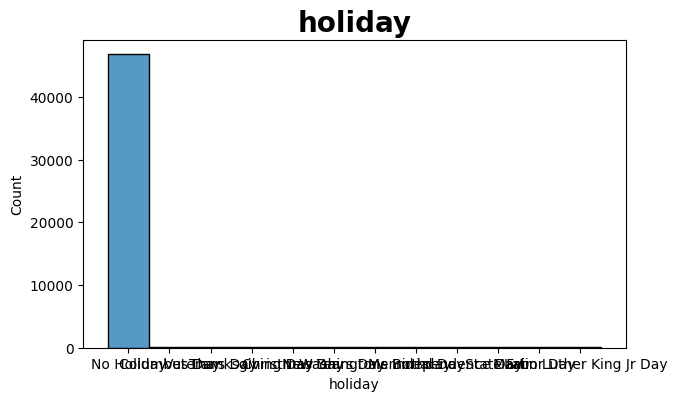

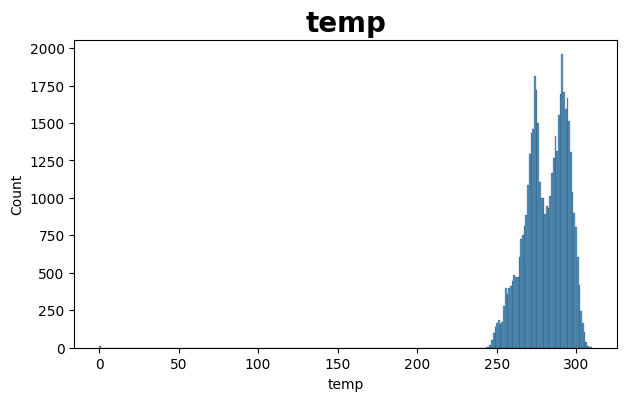

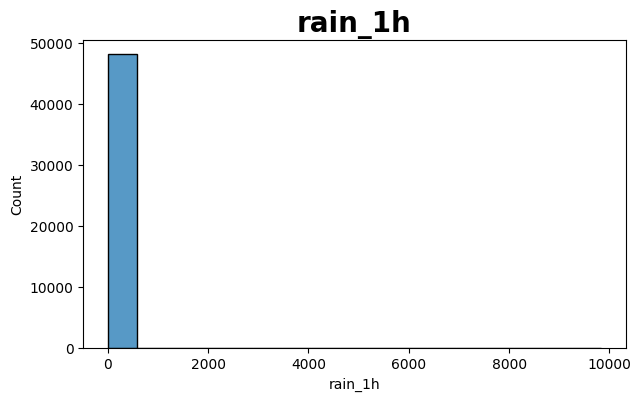

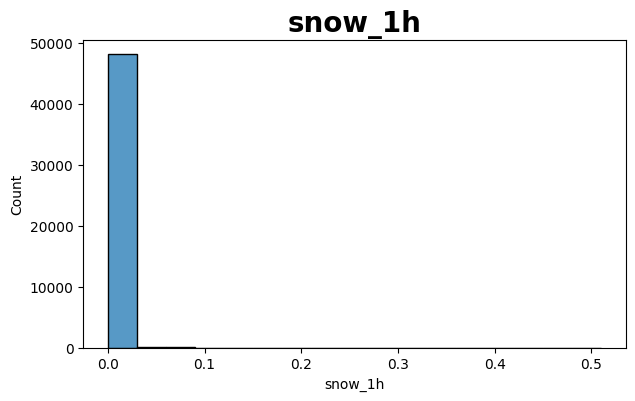

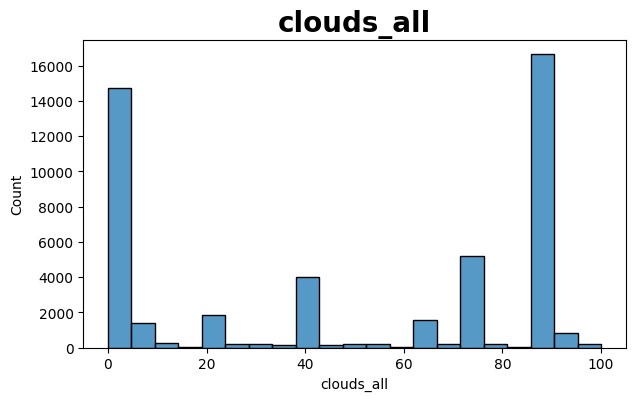

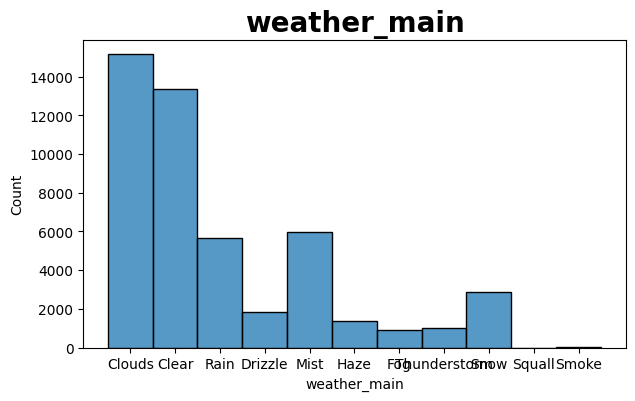

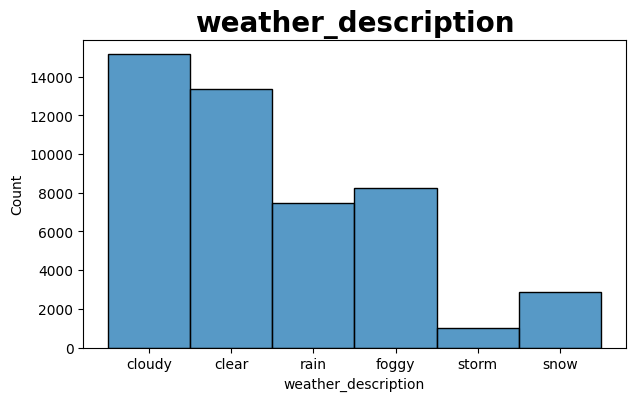

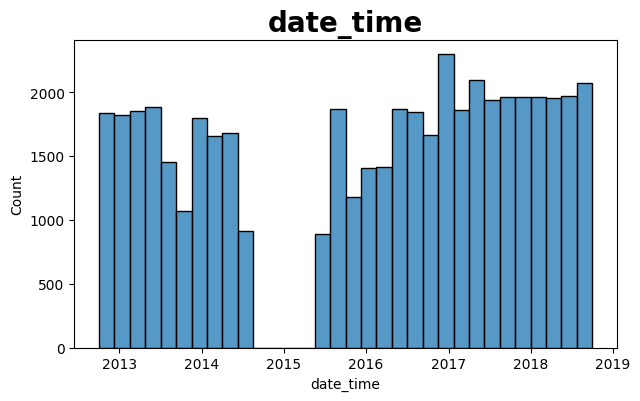

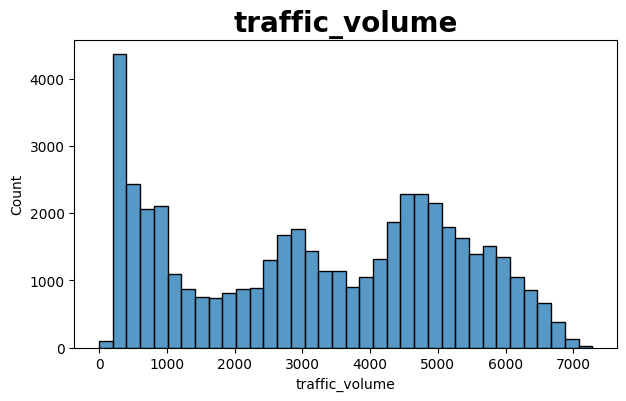

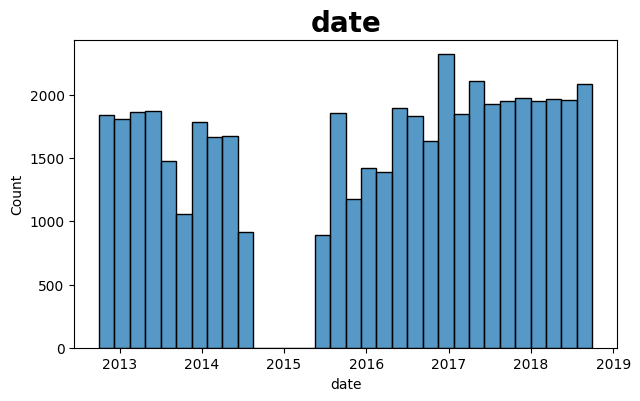

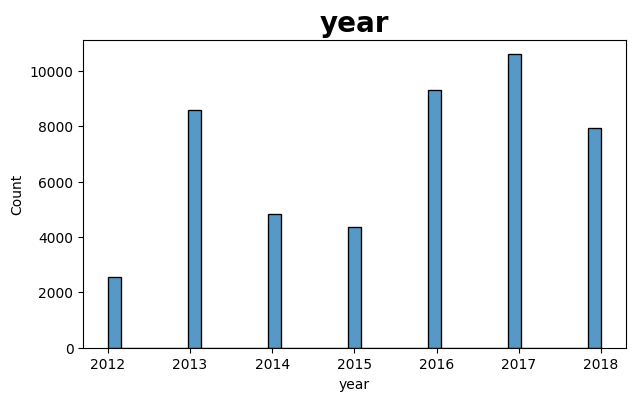

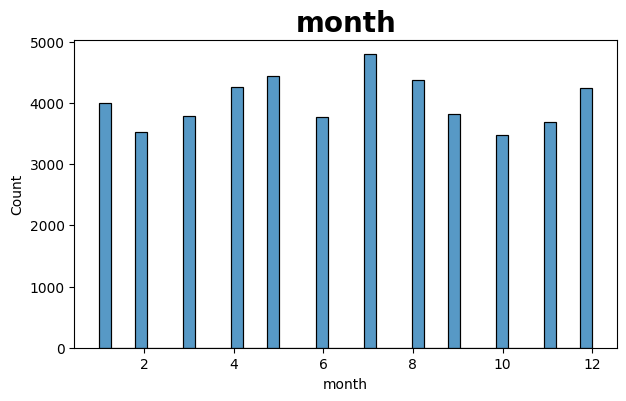

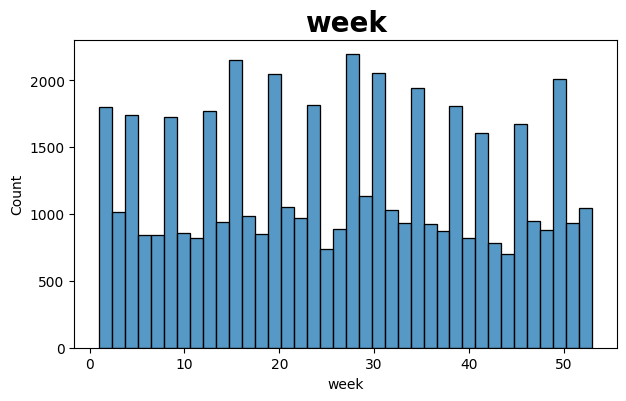

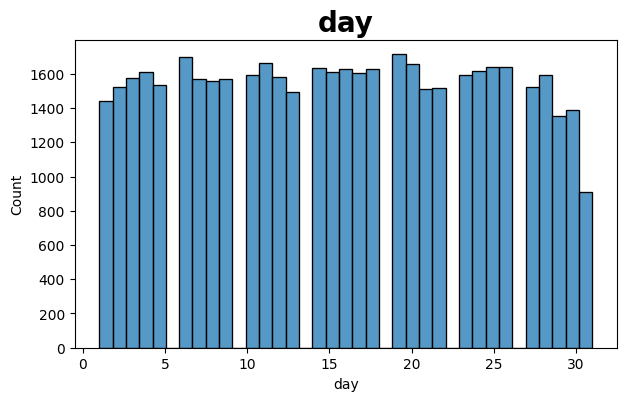

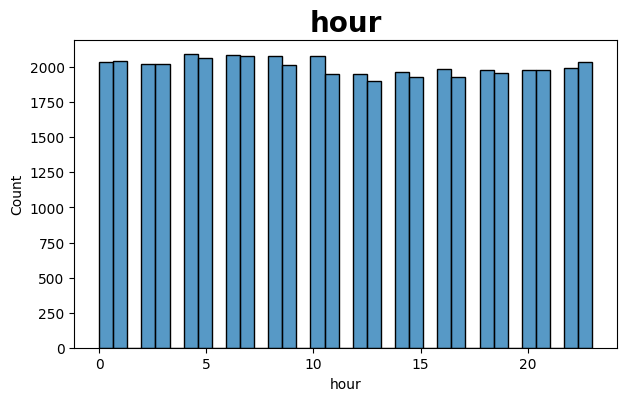

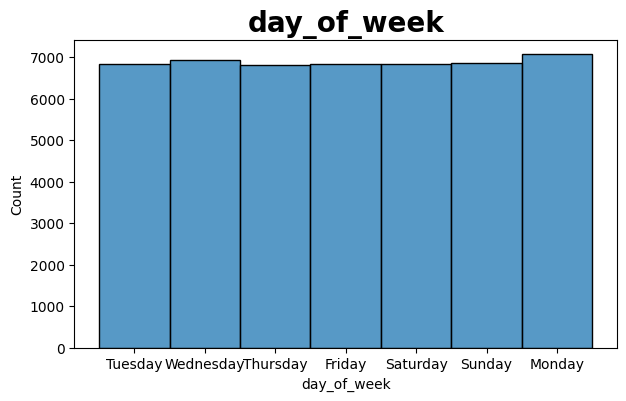

In [ ]:
for feat in df.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df,
               x = feat)
  plt.title(feat, fontsize=20, fontweight='bold')

<summary><font size="3" color="#ADD8E6"><b>Observations</b></font></summary>


| **Feature**           | **Distribution**       | **Action**                |
|------------------------|------------------------|---------------------------|
| **holiday**           | Categorical           | To be binary & Integer encoded      |
| **temp**              | Dual peak, far right skew | To be clipped (specifically remove 0 values)            |
| **rain_1h**           | Unknown               | To be binary encoded      |
| **snow_1h**           | Unknown               | To be binary encoded      |
| **clouds_all**        | Double peak           | N/A                       |
| **weather_main**      | Left skew             | N/A                       |
| **weather_description** | Left skew            | N/A                       |
| **date_time**         | Uniform distribution  | N/A                       |
| **traffic_volume**    | Triple peak           | N/A                       |

## Bivariate

<summary><font size="3" color="#ADD8E6"><b>Pairplot</b></font></summary>

*   For a quick and brief overview of the data.
*   Combined regression, histogram and scatter plots

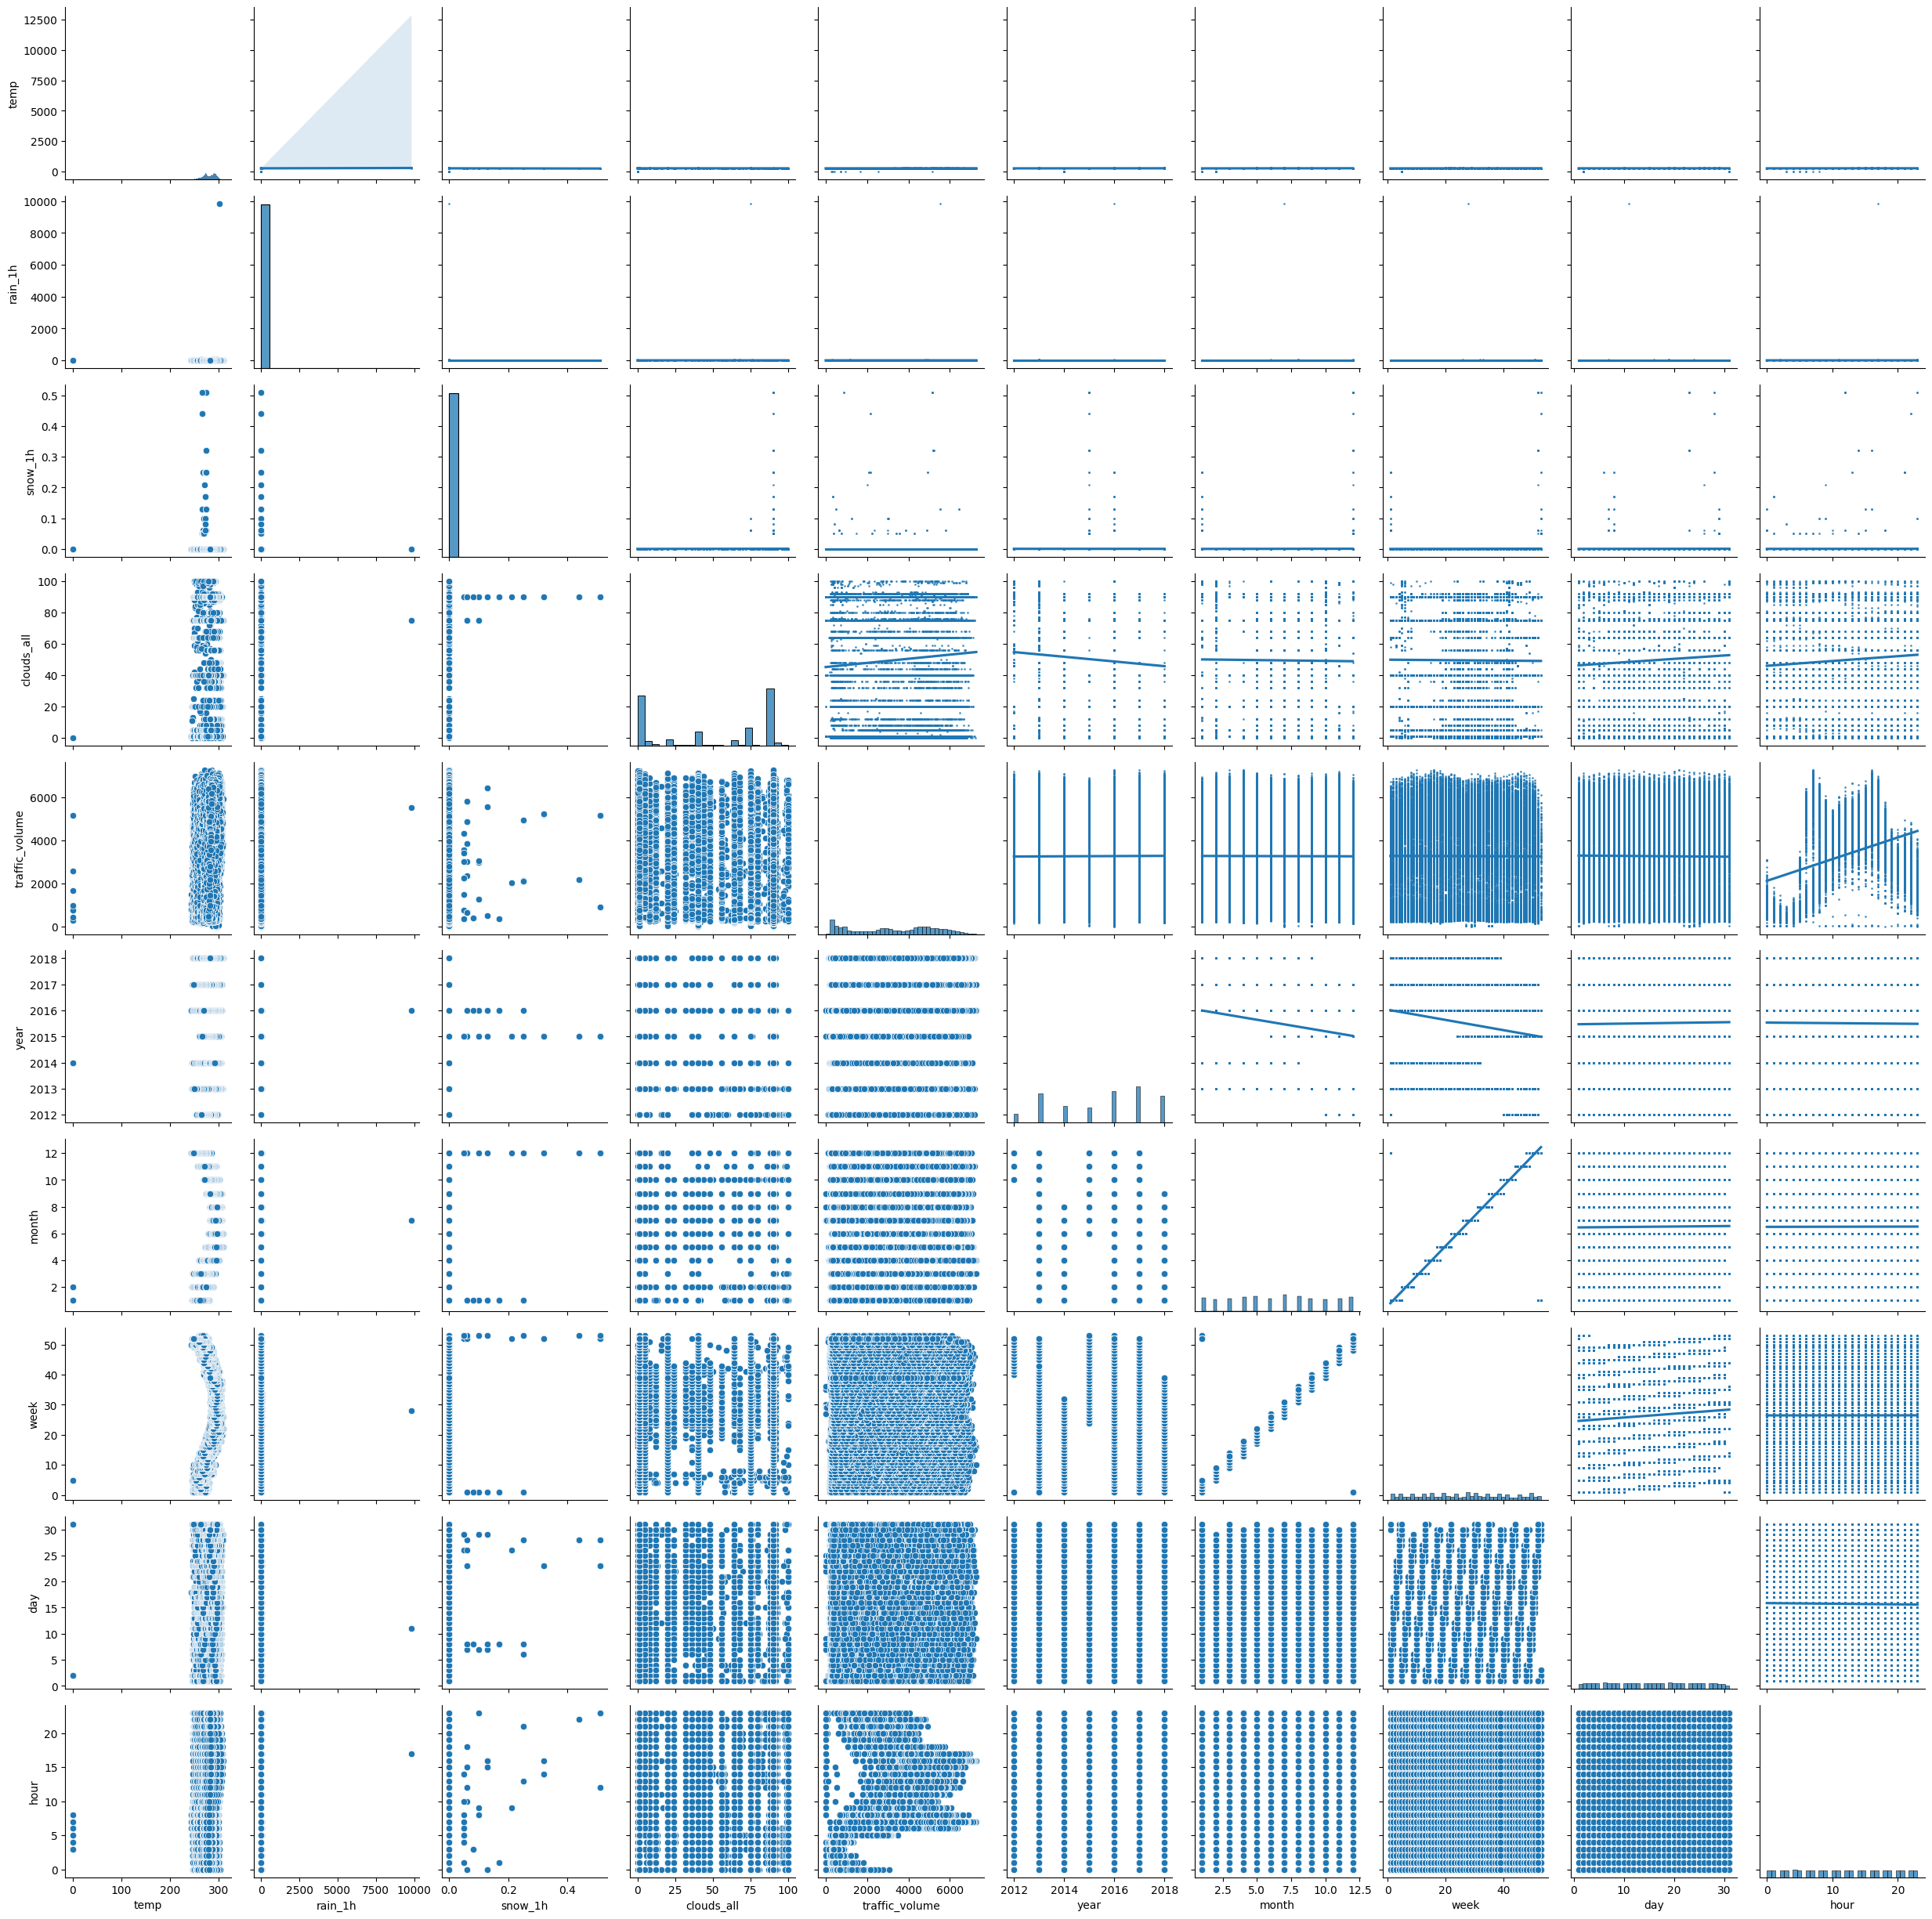

In [ ]:
g = sns.PairGrid(data=df)
g.map_diag(sns.histplot)
g.map_upper(sns.regplot, scatter_kws={'alpha':.7, 's':1})
g.map_lower(sns.scatterplot)

##Correlation Matrix

<summary><font size="3" color="#ADD8E6"><b>Correlation Matrix</b></font></summary>

*   To easily observe correlations that might be worth exploring.

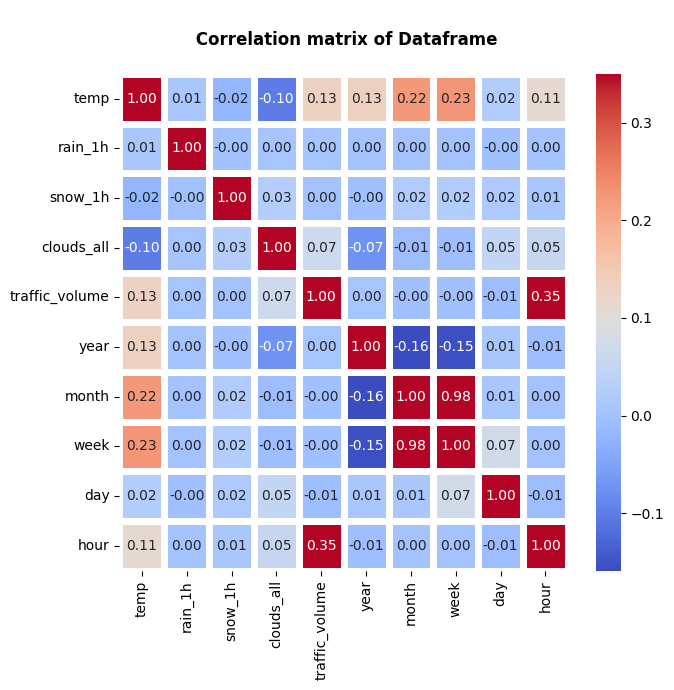

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', lw = 5, fmt='.2f', vmax=0.35)
plt.title('\n Correlation matrix of Dataframe\n', fontweight='bold')
plt.tight_layout()

#Data to CSV

At this point, I have the date ready for further analysis. I will leave feature engineering to the Modelling stage since I want this to be customised to the different models I will use for best results.

In [ ]:
df.to_csv('cleaned_data_metro_interstate_traffic_volume', index=False)